<a href="https://colab.research.google.com/github/chw8207/pytorch_study/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 환경 셋팅
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [45]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)주기
torch.manual_seed(1)

In [3]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [4]:
# X_train 출력 및 크기 확인
print(X_train)
print(X_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [5]:
# y_train 출력 및 크기 확인
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [6]:
# 가중치와 편향의 초기화
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시
# requires_grad=True : 학습을 통해 인자가 변경될 수 있음
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [7]:
# 편향b도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


#### 가설 세우기
 - H(x) = Wx + b

In [8]:
hypothesis = X_train*W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 비용 함수 선언하기
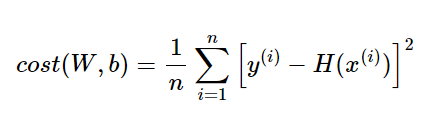

In [9]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [10]:
# 경사 하강법
optimizer = optim.SGD([W,b], lr=0.01)

In [ ]:
# optimizer.zero_grad() : 미분을 통해 얻은 기울기 0으로 초기화
# cost.backward() : 가중치와 편향에 대한 기울기 계산
# opimizer의 .step() : 가중치와 편향 업데이트

In [11]:
# gradient를 0으로 초기화
optimizer.zero_grad()

In [12]:
# 비용 함수를 미분하여 gradient 계산
cost.backward()

In [13]:
# W와 b를 업데이트
optimizer.step()

### 전체 코드

In [57]:
# 데이터
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

# 에포크 설정
nb_epochs = 2000
for epoch in range(nb_epochs+1) : 
  # H(x) 계산
  hypothesis = X_train*W+b

  # cost 계산
  cost = torch.mean((hypothesis-y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번 마다 로그 출력
  if epoch%100==0 : 
    print(f'Epoch {epoch:4d}/{nb_epochs} W: {W.item():.3f} b: {b.item():.3f} cost: {cost.item():.6f}')

Epoch    0/2000 W: 0.187 b: 0.080 cost: 18.666666
Epoch  100/2000 W: 1.746 b: 0.578 cost: 0.048171
Epoch  200/2000 W: 1.800 b: 0.454 cost: 0.029767
Epoch  300/2000 W: 1.843 b: 0.357 cost: 0.018394
Epoch  400/2000 W: 1.876 b: 0.281 cost: 0.011366
Epoch  500/2000 W: 1.903 b: 0.221 cost: 0.007024
Epoch  600/2000 W: 1.924 b: 0.174 cost: 0.004340
Epoch  700/2000 W: 1.940 b: 0.136 cost: 0.002682
Epoch  800/2000 W: 1.953 b: 0.107 cost: 0.001657
Epoch  900/2000 W: 1.963 b: 0.084 cost: 0.001024
Epoch 1000/2000 W: 1.971 b: 0.066 cost: 0.000633
Epoch 1100/2000 W: 1.977 b: 0.052 cost: 0.000391
Epoch 1200/2000 W: 1.982 b: 0.041 cost: 0.000242
Epoch 1300/2000 W: 1.986 b: 0.032 cost: 0.000149
Epoch 1400/2000 W: 1.989 b: 0.025 cost: 0.000092
Epoch 1500/2000 W: 1.991 b: 0.020 cost: 0.000057
Epoch 1600/2000 W: 1.993 b: 0.016 cost: 0.000035
Epoch 1700/2000 W: 1.995 b: 0.012 cost: 0.000022
Epoch 1800/2000 W: 1.996 b: 0.010 cost: 0.000013
Epoch 1900/2000 W: 1.997 b: 0.008 cost: 0.000008
Epoch 2000/2000 W: 

### optimizer.zero_grad()가 필요한 이유
 - 기울기 누적 문제를 해결하기 위해

In [58]:
# 기울기 누적 문제 예시
import torch
W = torch.tensor(2.0, requires_grad=True)